## Alexander Sanabria hierarchical clustering

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [78]:
#cargando librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

from  sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [79]:
Data = pd.read_csv('Mall_Customers.csv')

In [80]:
Data.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [81]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)'>

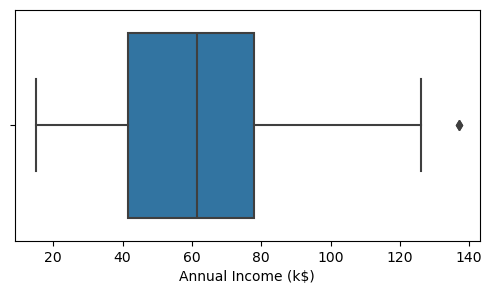

In [82]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Data['Annual Income (k$)'])

<Axes: xlabel='Age'>

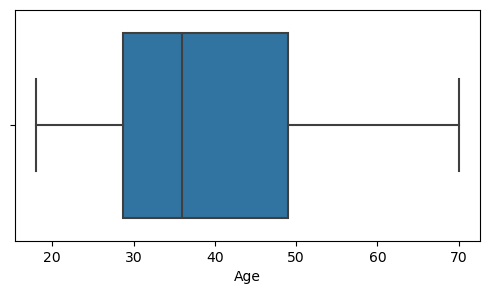

In [83]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Data['Age'])

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [84]:
Data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [85]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [86]:
Data = Data.drop('CustomerID',axis=1)
Data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [87]:
print("Cantidad de Registros con cero en Edad: ",Data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Genero: ",Data['Gender'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Annual Income : ",Data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data ASpending Score (1-100) : ",Data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Genero:  0
Cantidad de Registros con cero en Data Annual Income :  0
Cantidad de Registros con cero en Data ASpending Score (1-100) :  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

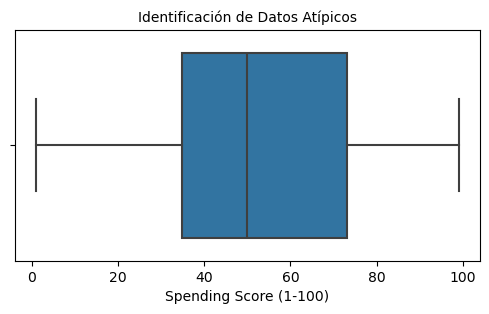

In [88]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [89]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Data['Spending Score (1-100)']<nivel_minimo)|(Data['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [90]:
Data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características



Característica de interes:

    Annual Income (k$) : cuanto gana la persona
    Spending Score (1-100)  : es el valor de de score que se le otorga el banco



In [91]:
Data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
5,1,22,17,76
6,1,35,18,6
7,1,23,18,94
8,0,64,19,3
9,1,30,19,72


In [92]:
Data['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

In [93]:
Data['Annual Income (k$)'].head(20)

0     15
1     15
2     16
3     16
4     17
5     17
6     18
7     18
8     19
9     19
10    19
11    19
12    20
13    20
14    20
15    20
16    21
17    21
18    23
19    23
Name: Annual Income (k$), dtype: int64

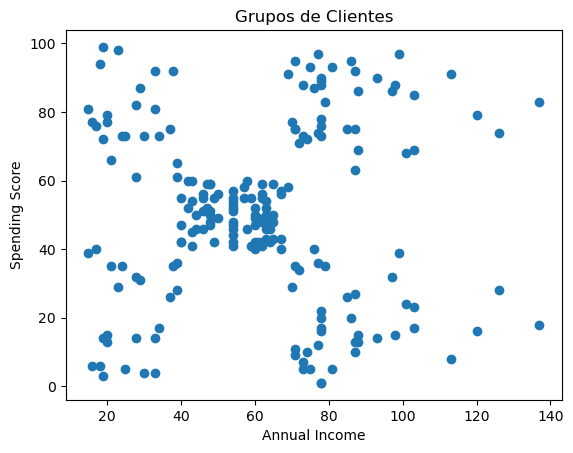

In [94]:
# Grafica antes del agrupamiento

plt.scatter(Data['Annual Income (k$)'], Data['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Grupos de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [95]:
X = Data[['Annual Income (k$)','Spending Score (1-100)']].values

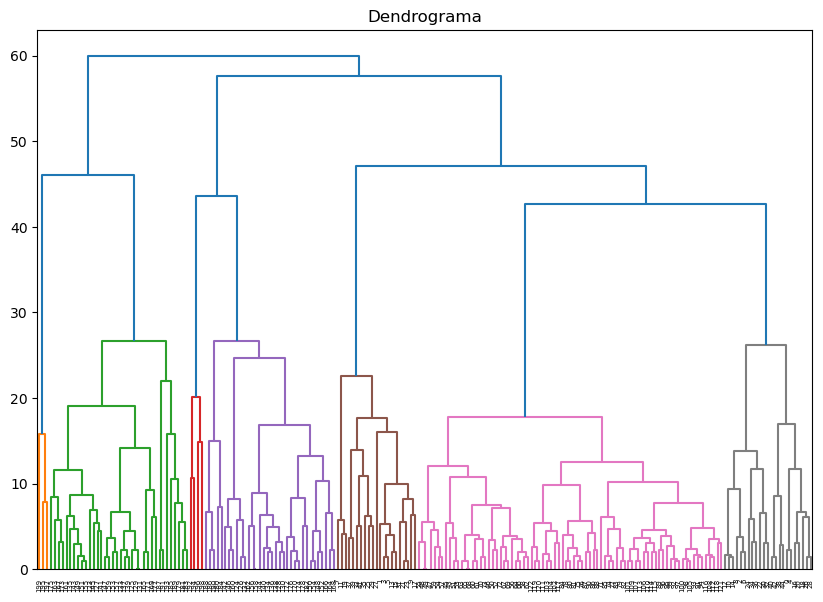

In [96]:
#  Realizar clustering jerarquico
linked = linkage(X, 'average')

#crear dendrograma
plt.figure(figsize = (10,7))
dendrogram(linked)
plt.title('Dendrograma')
plt.show()

In [97]:
clustering = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
clustering.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [98]:
Data['Etiqueta'] = clustering.labels_

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [99]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Data)
X = Data.drop('Etiqueta', axis=1)
clusters = Data['Etiqueta']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.39237802678454736 |
| Indice Calinski Harabasz | 102.06161124720659  |
|  Indice Davies Bouldin   | 0.7752104870792352  |
+--------------------------+---------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

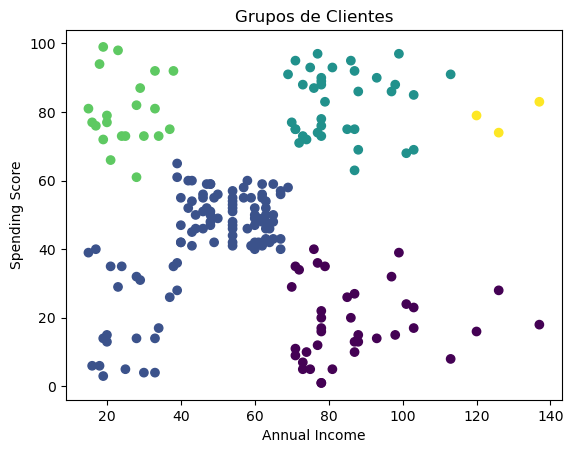

In [100]:
plt.scatter(Data['Annual Income (k$)'], Data['Spending Score (1-100)'], c=Data['Etiqueta'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Grupos de Clientes')
plt.show()


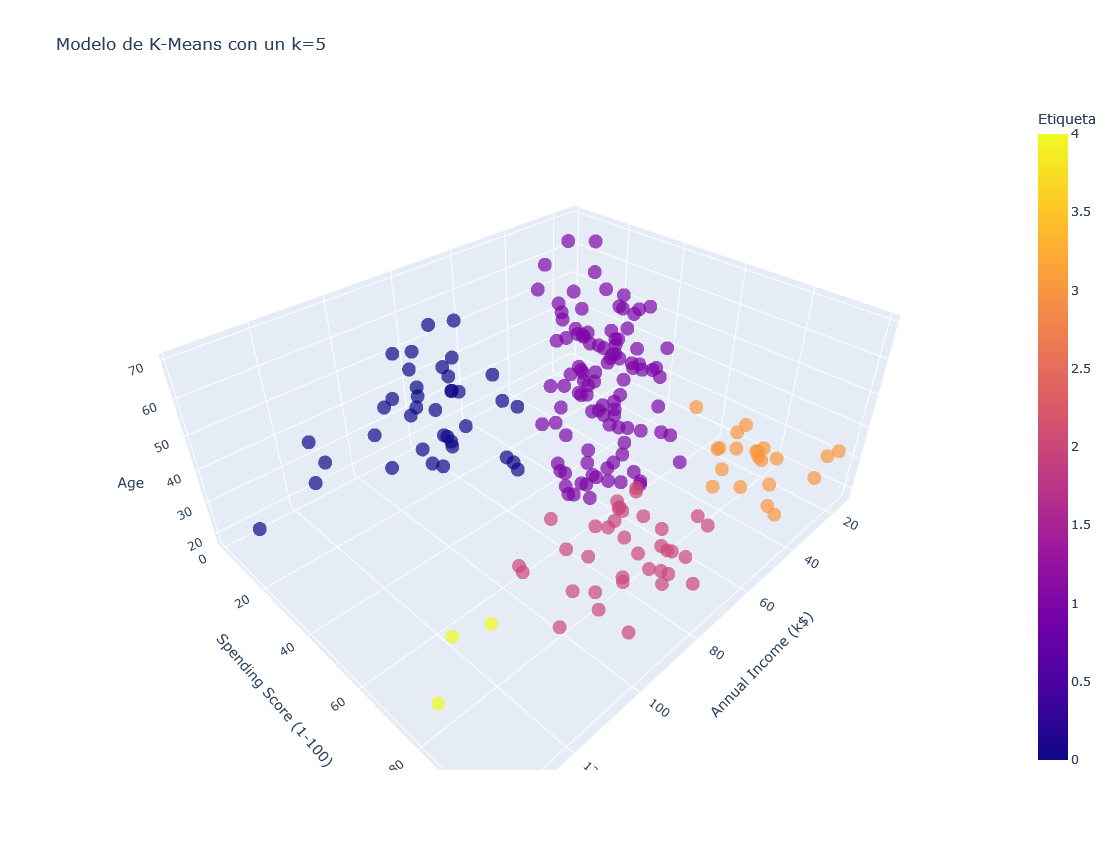

In [101]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Etiqueta', symbol='Etiqueta', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

## 7. Interpretar, analizar y documentar los resultados obtenidos


Del desempeño del modelo se puede describir:

    Coeficiente de Silhouette: Un valor de 0.39 sugiere una separación moderadamente buena entre los clusters.

    Índice de Calinski-Harabasz: Un valor de 102.06 sugiere una buena separación entre los clusters.

    Indice Davies Bouldin: Un valor de 0.775 sugiere una buena separación entre los clusters, pero quizás no tan fuerte como el indicado por el índice   Calinski Harabasz.


    Podemos notar despues de realizar la agrupacion podemos notar:
    
    en la etiqueta 1 que es el grupo mas central comprende rangos de 3 a 65 en score y un income de 16K hasta 69K en este grupo hay personas de todas las edades y comprende la mejor relacion score/income

    


